# Objective Of the Titanic Survival:
The main goal of using this dataset is to make predictions about whether a passenger would survive or not based on 
several characteristics like gender, class, age, etc. An expression used to describe this is "binary classification task."

# Importing all important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Reading all file

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.drop(columns=['PassengerId','Cabin','Ticket','Fare','Name'],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 23.0+ KB


# Visulazation of Data

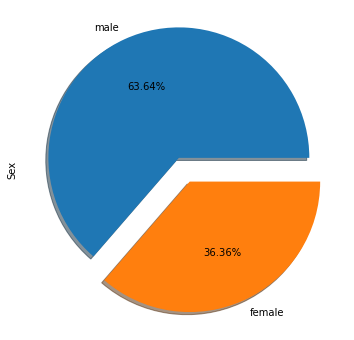

In [9]:
plt.figure(figsize=(12,6))

ax=df['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);

# '1' is present Male ratio in titanic is 63.64% and '0' is represent Female ratio in titanice is 36.36%

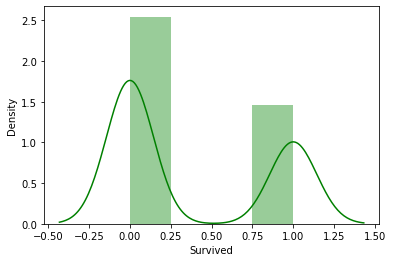

In [10]:
sns.distplot(df['Survived'],color="g")
plt.show()

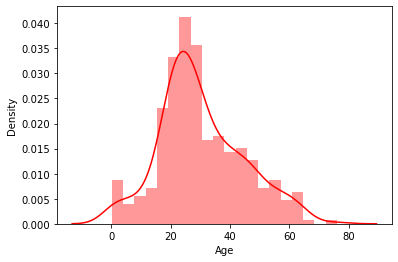

In [11]:
sns.distplot(df['Age'],color="r",bins=20,kde=True,)
plt.show()

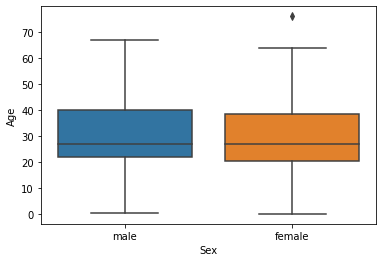

In [12]:
sns.boxplot(x='Sex', y = 'Age',data=df)
plt.show()

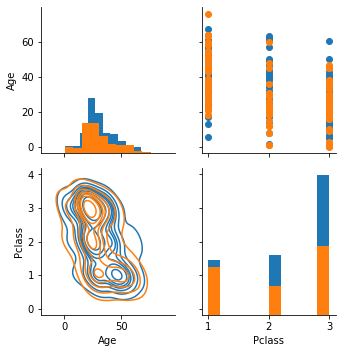

In [13]:
titanic_g = sns.PairGrid(df,hue='Sex',vars=['Age','Pclass'])
titanic_g.map_diag(plt.hist)
titanic_g.map_upper(plt.scatter)
titanic_g.map_lower(sns.kdeplot)
plt.show()

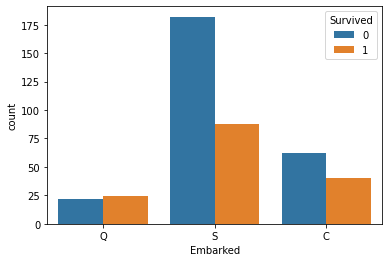

In [14]:
sns.countplot(data =df,x= 'Embarked',hue='Survived')
plt.show()

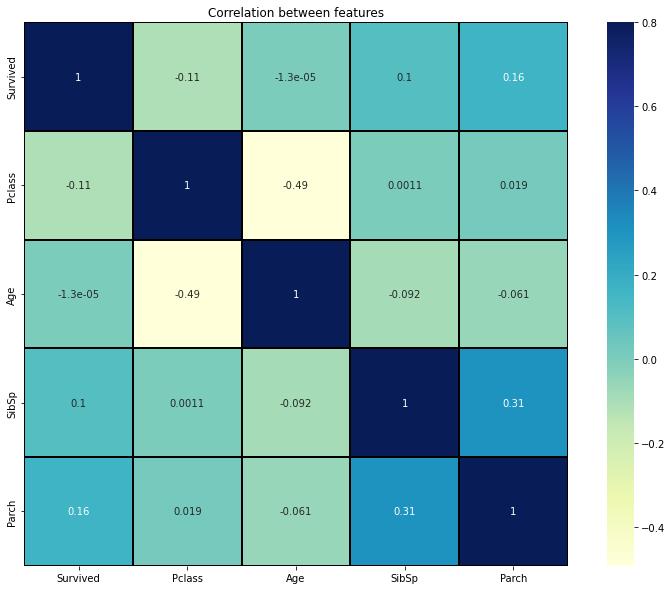

In [15]:
corr=df.corr()#["Survived"]
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

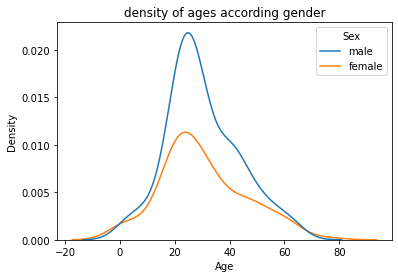

In [16]:
#what average of ages in each categorey 
sns.kdeplot(data = df , x ="Age" , hue ="Sex" )
plt.title("density of ages according gender")
plt.show()

In [17]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [18]:
rmean=df['Age'].mean()
rmean

30.272590361445783

In [19]:
df['Age'].fillna(rmean,inplace=True)

In [20]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 26.1+ KB


# The dataset typically contains information on around 418 passengers. There are variations of the dataset with more or fewer entries, but the commonly used contains 418 rows.

In [23]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [24]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [25]:
#preprocessing or labelencoding
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()

In [27]:
df['Sex']=le.fit_transform(df['Sex'])

In [28]:
df['Sex']

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int32

In [29]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [30]:
df['Embarked']

0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int32

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,34.5,0,0,1
1,1,3,0,47.0,1,0,2
2,0,2,1,62.0,0,0,1
3,0,3,1,27.0,0,0,2
4,1,3,0,22.0,1,1,2


In [32]:
x=df.iloc[:,1:]

In [33]:
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.50000,0,0,1
1,3,0,47.00000,1,0,2
2,2,1,62.00000,0,0,1
3,3,1,27.00000,0,0,2
4,3,0,22.00000,1,1,2
...,...,...,...,...,...,...
413,3,1,30.27259,0,0,2
414,1,0,39.00000,0,0,0
415,3,1,38.50000,0,0,2
416,3,1,30.27259,0,0,2


In [34]:
y=df['Survived']

In [35]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [36]:
#Split model

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn=KNeighborsClassifier()

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
#Hypertunning the value of k
acc=[]
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    a=accuracy_score(ytest,ypred)
    acc.append(a)

In [43]:
acc

[0.8690476190476191,
 0.8571428571428571,
 0.8452380952380952,
 0.8095238095238095,
 0.8690476190476191,
 0.8571428571428571,
 0.8928571428571429,
 0.8928571428571429,
 0.9047619047619048,
 0.8452380952380952,
 0.8571428571428571,
 0.7857142857142857,
 0.8214285714285714,
 0.7976190476190477]

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [46]:
ypred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [47]:
accuracy_score(ytest,ypred)

0.7619047619047619

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(ytest,ypred)

array([[50,  8],
       [12, 14]], dtype=int64)

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        58
           1       0.64      0.54      0.58        26

    accuracy                           0.76        84
   macro avg       0.72      0.70      0.71        84
weighted avg       0.75      0.76      0.76        84



In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
#hypertuning using solver parameter
logreg=LogisticRegression(solver="liblinear")
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [54]:
ypred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        26

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [57]:
#hypertuning using solver parameter
logreg=LogisticRegression(solver="saga")
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [58]:
ypred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [59]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.96      1.00      0.98        26

    accuracy                           0.99        84
   macro avg       0.98      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



In [60]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)
logreg=LogisticRegression(solver="saga")
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        26

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# Challenges:The dataset poses some intriguing analysis and modelling issues. For example, there may be inherent biases in survival rates due to characteristics such as class and gender. Furthermore, imbalanced classes (more non-survivors than survivors) can have an effect on model performance.
